<span style='color:#c7d5e0'>
<h1>Steam Games Library Analysis</h1>
</span>

Data from [Kaggle](https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam)

additional data from [Kaggle](https://www.kaggle.com/datasets/amanbarthwal/steam-store-data)

[Github](https://github.com/dmm4613/steam-games-eda)

<span style='color:#66c0f4'>
<h2> Outline </h2>
<h3> Descriptive Analysis Questions </h3>
<ol>
<li> What operating system has the most playable games? </li>
<li> What is the average price for games on steam? </li>
<li> Which games have been played/reviewed the most? </li>
<li> What type of games were released in 2020? </li>
<li> How have games in 2020 been rated/received? </li>
</ol>
<h3> Inferential Analysis </h3>
<ol>
<li> Did games from 2020 do better overall than other games from the between 2016 to 2023? </li>
<li> Did prices of games change compared to 2020? </li>
<li> Which year had the most expensive game releases overall? </li>
</ol>
<h3> Final Analysis </h3>
<h3> Recommendations </h3>
</span>

____

<span style='color:#c7d5e0'>
<h2> Descriptive Analysis </h2>
</span>

<span style='color:#c7d5e0'>
<h3> Data intake and cleaning </h3>
</span>

In [194]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

In [195]:
df = pd.read_csv('data/games.csv')
df_genres = pd.read_csv('data/games-genres.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [196]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [197]:
#convert date_release to date_time

df['date_release'] = pd.to_datetime(df['date_release'])

df['date'] = df['date_release'].dt.date
df['month'] = df['date_release'].dt.to_period('M').astype(str)

In [198]:
# Create a custom palette using steam's palette

custom_palette = sns.color_palette(['#c7d5e0','#66c0f4','#2a475e','#1b2838','#171a21'], n_colors=100)
custom_palette_gradient = sns.color_palette('blend:#c7d5e0,#66c0f4,#2a475e,#1b2838,#171a21', as_cmap=True)


<span style='color:#c7d5e0'>
<h3> What operating system has the most playable games? </h3>
</span>

In [199]:
# create a dateframe with just the operating systems
df_os = df[['win', 'mac', 'linux']]

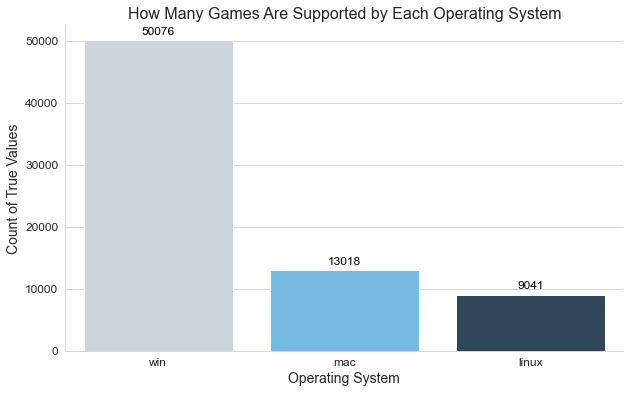

In [200]:
# Transform dataframe to long format
df_long = df_os.melt(var_name='os', value_name='count')

# Filter to include only True values
df_true = df_long[df_long['count'] == True]


sns.set_style(style="whitegrid")

plt.figure(figsize=(10,6))

ax = sns.countplot(data=df_true, x='os', palette=custom_palette)

ax.set_xlabel("Operating System", fontsize=14)
ax.set_ylabel("Count of True Values", fontsize=14)
ax.set_title("How Many Games Are Supported by Each Operating System", fontsize=16)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotate each bar with the value count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points',
                fontsize=12, color='black')

sns.despine()

plt.show()

<span style='color:#c7d5e0'>
<p> There's a pretty distinct difference in the amount of games supported by each operating system. Windows OS is the clear standout </p>
</span>

<span style='color:#c7d5e0'>
<h3> What is the average price for games on steam? </h3>
</span>

In [201]:
# create a dataframe with only prices and sale prices
df_prices = df[['price_final', 'price_original']]

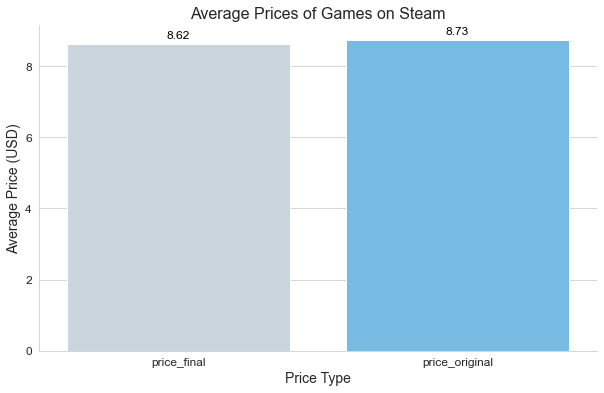

In [202]:
# Calculate average prices
avg_prices = df_prices.mean().reset_index()
avg_prices.columns = ['price_type', 'average_price']

# Set the seaborn style
sns.set_style(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_prices, x='price_type', y='average_price', palette=custom_palette)

# Add labels and title
ax.set_xlabel("Price Type", fontsize=14)
ax.set_ylabel("Average Price (USD)", fontsize=14)
ax.set_title("Average Prices of Games on Steam", fontsize=16)

# Customize the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotate each bar with the average price
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points',
                fontsize=12, color='black')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

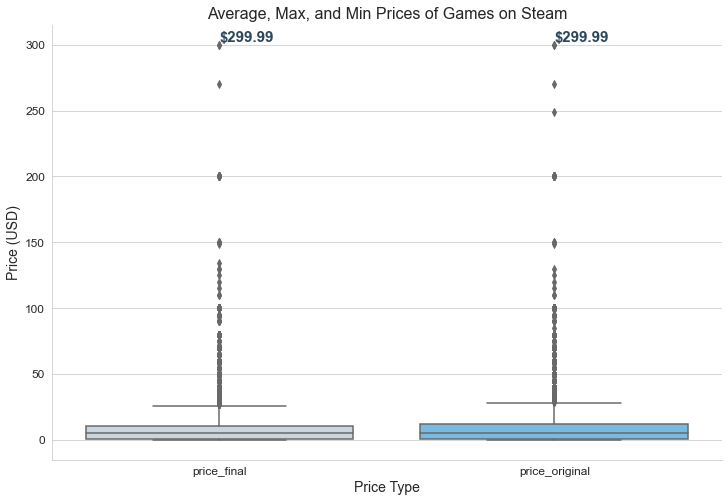

In [203]:

# Transform the DataFrame to long format
df_long = df_prices.melt(var_name='price_type', value_name='price')

# Set the seaborn style
sns.set_style(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df_long, x='price_type', y='price', palette=custom_palette)

# Add labels and title
ax.set_xlabel("Price Type", fontsize=14)
ax.set_ylabel("Price (USD)", fontsize=14)
ax.set_title("Average, Max, and Min Prices of Games on Steam", fontsize=16)

# Customize the tick parameters
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Annotate the highest value
max_prices = df_long.groupby('price_type')['price'].max().reset_index()

for i, row in max_prices.iterrows():
    ax.text(i, row['price'], f'${row["price"]:.2f}', 
            ha='left', va='bottom', fontsize=15, color='#2a475e', weight='bold')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

<span style='color:#c7d5e0'>
<p> It's pretty crazy how the average price for both original and sale price sits at ~$8.60 - $8.70, whereas there are some insane outliers. A $299.99 game? Let's just pull up what game that is.</p>
</span>

In [204]:
filtered_df = df[df['price_final'] == 299.99]

titles = filtered_df['title'].unique()
print(titles[0])

Clickteam Fusion 2.5 Developer Upgrade


<img src='images/click-fusion.png'>

<span style='color:#c7d5e0'>
<p> Clickteam Fusion 2.5 Developer Upgrade. And this is the DLC</p>
</span>

____ 

<span style='color:#c7d5e0'>
<h3> Which games have been played/reviewed the most? </h3>

<p> Basing the played aspect as most reviewed, since the more people reviewing, the more the game should have been played. Barring any review bombs for outside reasons</p>
</span>

In [205]:
df_sorted = df.sort_values(by='user_reviews', ascending=False)

top_100_games = df_sorted.head(100)
top_100_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,date,month
14398,730,Counter-Strike: Global Offensive,2012-08-21,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True,2012-08-21,2012-08
47770,578080,PUBG: BATTLEGROUNDS,2017-12-21,True,False,False,Mixed,57,2217226,0.0,0.0,0.0,True,2017-12-21,2017-12
13176,570,Dota 2,2013-07-09,True,True,True,Very Positive,82,2045628,0.0,0.0,0.0,True,2013-07-09,2013-07
12717,271590,Grand Theft Auto V,2015-04-13,True,False,False,Very Positive,86,1484122,0.0,0.0,0.0,True,2015-04-13,2015-04
14535,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,True,False,False,Very Positive,86,993312,20.0,0.0,0.0,True,2015-12-01,2015-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47793,427520,Factorio,2020-08-14,True,True,True,Overwhelmingly Positive,96,134384,35.0,0.0,0.0,True,2020-08-14,2020-08
11720,444200,World of Tanks Blitz,2016-11-09,True,True,False,Very Positive,80,131334,0.0,0.0,0.0,True,2016-11-09,2016-11
480,552520,Far Cry® 5,2018-03-26,True,False,False,Very Positive,80,129943,60.0,0.0,0.0,True,2018-03-26,2018-03
15926,552990,World of Warships,2017-11-15,True,False,False,Mostly Positive,76,129335,0.0,0.0,0.0,True,2017-11-15,2017-11


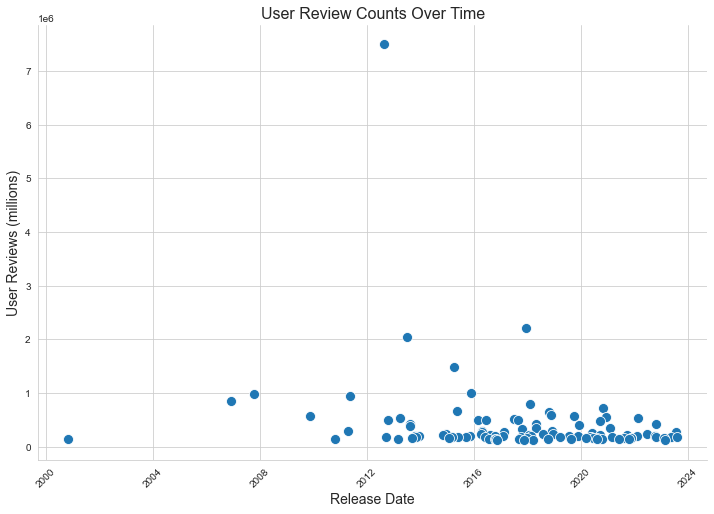

In [206]:
# Set the seaborn style
sns.set_style(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=top_100_games, x='date_release', y='user_reviews', s=100)

# Add labels and title
ax.set_xlabel("Release Date", fontsize=14)
ax.set_ylabel("User Reviews (millions)", fontsize=14)
ax.set_title("User Review Counts Over Time", fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the top and right spines for a cleaner look
sns.despine()

plt.show()

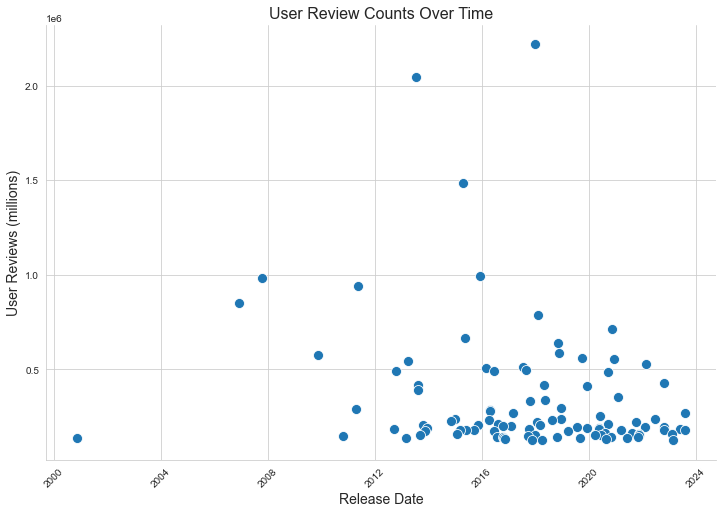

The most reviews for a game is 7,494,460 and the game is: 
Counter-Strike: Global Offensive


In [207]:
filtered_games = top_100_games[top_100_games['user_reviews'] <= 5_000_000]
most_reviews_for_game = top_100_games['user_reviews'].max()
top_reviewed_game = top_100_games.loc[top_100_games['user_reviews'].idxmax()]
game_title = top_reviewed_game['title']

# Set the seaborn style
sns.set_style(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=filtered_games, x='date_release', y='user_reviews', s=100)

# Add labels and title
ax.set_xlabel("Release Date", fontsize=14)
ax.set_ylabel("User Reviews (millions)", fontsize=14)
ax.set_title("User Review Counts Over Time", fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the top and right spines for a cleaner look
sns.despine()

plt.show()

print(f'The most reviews for a game is {most_reviews_for_game:,} and the game is: ')
print(game_title)

____ 

<span style='color:#c7d5e0'>
<h3> What type of games were released in 2020? </h3>
</span>



In [208]:
# Merge the DataFrames on 'app_id'
merged_df = pd.merge(df, df_genres, on='app_id')

columns_to_keep = ['title_x', 'date_release', 'user_reviews', 'categories', 'genres', 'rating', 'positive_ratio', 'price_final']
filtered_df = merged_df[columns_to_keep]

# Create 'month' column with abbreviated month names
filtered_df['month'] = filtered_df['date_release'].dt.strftime('%b')

# Create 'year' column with year
filtered_df['year'] = filtered_df['date_release'].dt.year

games_2020 = filtered_df[filtered_df['date_release'].dt.year == 2020]


<ipython-input-208-b9c2cebeeabe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['date_release'].dt.strftime('%b')
<ipython-input-208-b9c2cebeeabe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['date_release'].dt.year


In [209]:
games_2020['genres'].value_counts().head(25)

genre_counts = games_2020['genres'].value_counts()

top_25_genres = genre_counts.head(25).index

filtered_games = games_2020[games_2020['genres'].isin(top_25_genres)]

In [210]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Pivot the DataFrame to get counts of games by month and genre
heatmap_data = filtered_games.pivot_table(
    index='genres',   # Rows will be genres
    columns='month',  # Columns will be months
    aggfunc='size',   # Count occurrences
    fill_value=0      # Fill missing values with 0
)

heatmap_data = heatmap_data.reindex(columns=month_order)


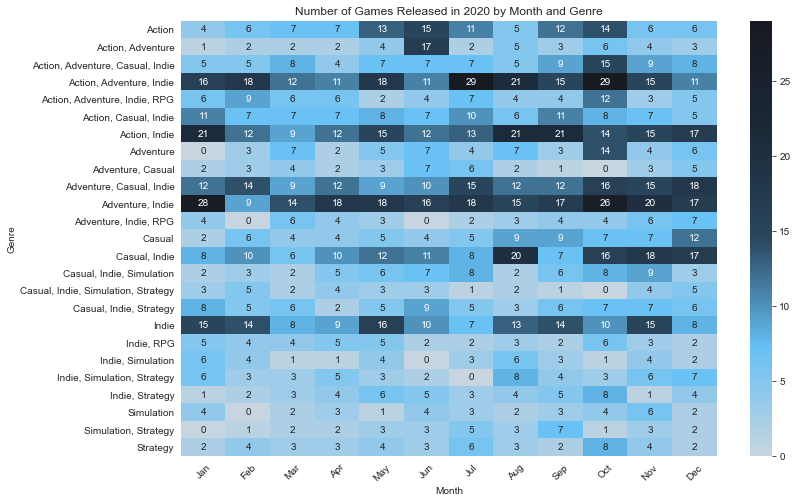

In [211]:
# Set the seaborn style
sns.set_style(style="whitegrid")

# Create the heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(heatmap_data, cmap=custom_palette_gradient, annot=True, fmt='d')

plt.title('Number of Games Released in 2020 by Month and Genre')
plt.xlabel('Month')
plt.ylabel('Genre')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

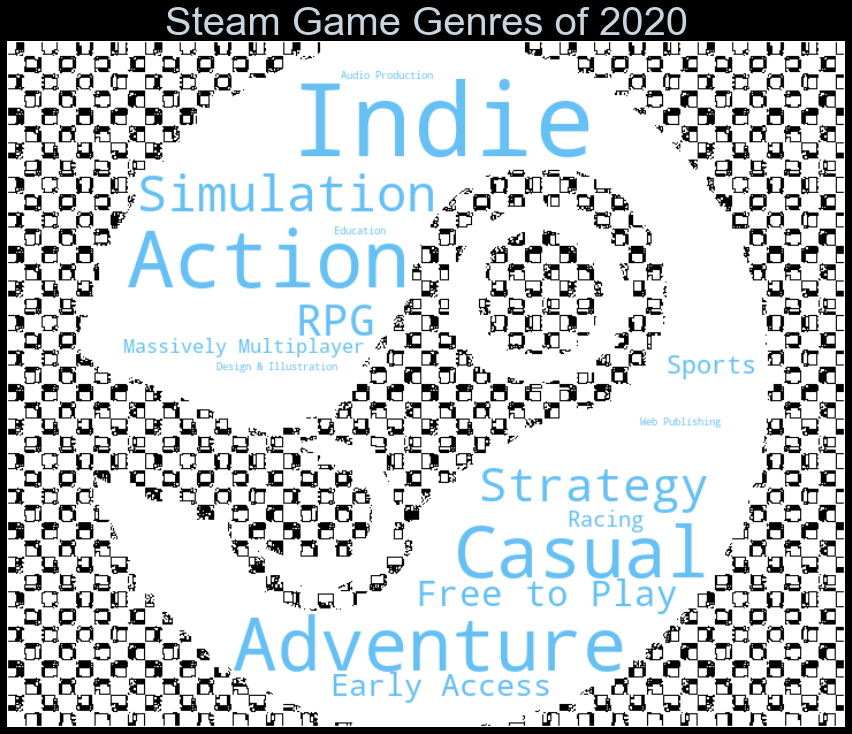

In [212]:
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from PIL import Image

#Create the mask
steam_mask = np.array(Image.open('images/steam-logo.jfif'))

#Grab the mask colors
colors = ImageColorGenerator(steam_mask)

games_2020_copy = games_2020.copy()

games_2020_copy['genres'] = games_2020_copy['genres'].fillna('').astype(str)

# Combine all genre entries into a single string
all_genres = ','.join(games_2020_copy['genres'])

genres = [genre.strip() for genre in all_genres.split(',') if genre.strip()]

genre_counts = Counter(genres)
genre_counts_dict = dict(genre_counts)

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(202, 87%, 68%)")

font_path = None

# Create a word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', color_func=colors, 
                      contour_color='black', contour_width=1, collocations=False,
                      font_path=font_path, mask=steam_mask).generate_from_frequencies(genre_counts_dict)
wordcloud.recolor(color_func = grey_color_func)

# Display the word cloud
plt.figure(figsize=(20, 10), facecolor='k')
plt.imshow(wordcloud)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Steam Game Genres of 2020', color='#c7d5e0', fontsize=40)
plt.tight_layout(pad=0)
plt.show()

____ 

<span style='color:#c7d5e0'>
<h3> How have games in 2020 been rated/received? </h3>
</span>


In [213]:
genre_counts_dict

{'Simulation': 941,
 'Strategy': 828,
 'Action': 1704,
 'Casual': 1553,
 'Indie': 2974,
 'RPG': 712,
 'Adventure': 1683,
 'Massively Multiplayer': 124,
 'Free to Play': 451,
 'Racing': 163,
 'Sports': 215,
 'Early Access': 340,
 'Audio Production': 1,
 'Design & Illustration': 1,
 'Education': 1,
 'Web Publishing': 1}

In [214]:
games_2020['rating'].unique()

array(['Very Positive', 'Mostly Positive', 'Mixed',
       'Overwhelmingly Positive', 'Positive', 'Mostly Negative',
       'Negative', 'Very Negative'], dtype=object)

c:\Users\dmm46\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Users\dmm46\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


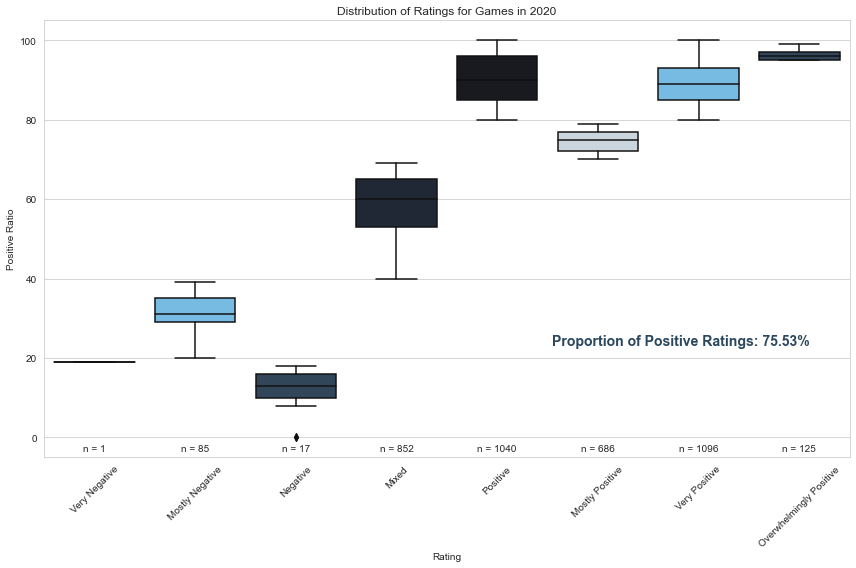

In [215]:
rating_order = ['Very Negative', 'Mostly Negative', 'Negative', 'Mixed', 
                'Positive', 'Mostly Positive', 'Very Positive', 'Overwhelmingly Positive']

rating_mapping = {rating: index for index, rating in enumerate(rating_order)}

# Map the 'rating' column to the numeric values based on the order
games_2020.loc[:, 'rating_order'] = games_2020['rating'].map(rating_mapping)

# Sort the DataFrame by the new 'rating_order' column
games_2020_sorted = games_2020.sort_values('rating_order')


# Filter for positive ratings
positive_ratings = ['Positive', 'Mostly Positive', 'Very Positive', 'Overwhelmingly Positive']
positive_counts = games_2020_sorted[games_2020_sorted['rating'].isin(positive_ratings)].shape[0]
total_counts = games_2020_sorted.shape[0]
positive_proportion = positive_counts / total_counts


# Set the seaborn style
sns.set_style(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='rating', y='positive_ratio', data=games_2020_sorted, order=rating_order, palette=custom_palette)

plt.title('Distribution of Ratings for Games in 2020')
plt.ylabel('Positive Ratio')
plt.xlabel('Rating')
plt.xticks(rotation=45)

n_counts = games_2020_sorted['rating'].value_counts().reindex(rating_order)
for i, count in enumerate(n_counts):
    ax.text(i, 0.01, f'n = {count}', ha='center', va='bottom', transform=ax.get_xaxis_transform())

# Add text annotation for positive proportion
plt.text(0.95, 0.25, f'Proportion of Positive Ratings: {positive_proportion:.2%}', 
         ha='right', va='bottom', fontsize=14, color='#2a475e', fontweight='bold', transform=ax.transAxes)

plt.tight_layout()
plt.show()


<span style='color:#c7d5e0'>
<p> Based off this information, games did generally well in 2020 with a 75.53% proportion of positive or higher ratings </p>
</span>

____

<span style='color:#c7d5e0'>
<h2> Inferential Analysis </h2>

<h3> Did games from 2020 do better overall than other games from the between 2016 to 2023? </h3>
</span>

In [216]:
# Define the positive rating categories
positive_ratings = ['Positive', 'Mostly Positive', 'Very Positive', 'Overwhelmingly Positive']

# Function to calculate positive rating proportion for a given year
def calculate_positive_proportion(df, year):
    year_data = df[df['year'] == year]
    positive_counts = year_data['rating'].isin(positive_ratings).sum()
    total_counts = year_data['rating'].shape[0]
    return positive_counts / total_counts if total_counts > 0 else 0

# Calculate proportions for each year
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
proportions = {year: calculate_positive_proportion(filtered_df, year) for year in years}

<span style='color:#c7d5e0'>
<p> H0: Games made outside of 2020 will not have a difference in positive rating proportion </p>
<p> HA: Games made outside of 2020 will have a major difference in positive rating proportion </p>
<p> A significance level of 80% </p>
</span>

In [217]:
from scipy.stats import chi2_contingency

# Prepare the contingency table
# Separate data into two groups: 2020 and other years
games_2020 = filtered_df[filtered_df['year'] == 2020]
games_non_2020 = filtered_df[filtered_df['year'] != 2020]

# Count positive ratings
positive_2020 = games_2020['rating'].isin(positive_ratings).sum()
positive_non_2020 = games_non_2020['rating'].isin(positive_ratings).sum()

# Count total ratings
total_2020 = games_2020.shape[0]
total_non_2020 = games_non_2020.shape[0]

# Create the contingency table
contingency_table = pd.DataFrame({
    'Positive': [positive_2020, positive_non_2020],
    'Negative': [total_2020 - positive_2020, total_non_2020 - positive_non_2020]
})

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2 Stat: {chi2_stat}, p-value: {p_val}')

# Determine the alpha for a significance level of 80%
alpha = 1 - 0.80

# Compare the p-value to the significance level
if p_val < alpha:
    print('Reject the null hypothesis (H0): There is a significant difference in positive rating proportions.')
else:
    print('Fail to reject the null hypothesis (H0): There is no significant difference in positive rating proportions.')

Chi2 Stat: 30.733051348541867, p-value: 2.960786585830045e-08
Reject the null hypothesis (H0): There is a significant difference in positive rating proportions.


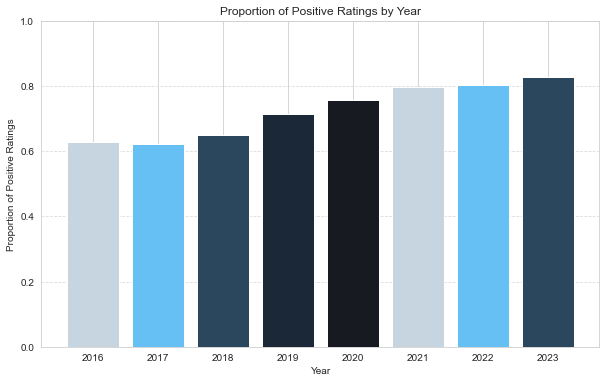

In [218]:
plt.figure(figsize=(10, 6))
plt.bar(proportions.keys(), proportions.values(), color=custom_palette)

plt.xlabel('Year')
plt.ylabel('Proportion of Positive Ratings')
plt.title('Proportion of Positive Ratings by Year')
plt.ylim(0, 1)  # Adjust if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



<span style='color:#c7d5e0'>

<h3> Did prices of games change compared to 2020? </h3>

<p> H0: Games made outside of 2020 will not have a difference cost </p>
<p> HA: Games made outside of 2020 will cost more overall </p>
<p> A significance level of 90% </p>

</span>

In [219]:

# We will get smaller samples
np.random.seed(42)

# Sample 1000 games from each group
sample_2020 = games_2020.sample(n=1000, random_state=42)
sample_non_2020 = games_non_2020.sample(n=1000, random_state=42)

# Extract prices
prices_2020 = sample_2020['price_final'].dropna()
prices_non_2020 = sample_non_2020['price_final'].dropna()

# Determine the alpha for significance level of 90%
alpha = 1 - 0.90

In [220]:
from scipy.stats import shapiro

# Normality test for 2020 prices
stat_2020, p_2020 = shapiro(prices_2020)
print(f'2020 Prices Normality Test: Statistic = {stat_2020}, p-value = {p_2020}')

# Normality test for other years prices
stat_non_2020, p_non_2020 = shapiro(prices_non_2020)
print(f'Non-2020 Prices Normality Test: Statistic = {stat_non_2020}, p-value = {p_non_2020}')

# Compare the p-value to the significance level
if p_2020 < alpha:
    print('Reject the null hypothesis (H0): The data may be normally distributed')
else:
    print('Fail to reject the null hypothesis (H0): The data may be normally distributed')

2020 Prices Normality Test: Statistic = 0.7999120354652405, p-value = 2.2492546246976986e-33
Non-2020 Prices Normality Test: Statistic = 0.7559380531311035, p-value = 5.2777199574368914e-36
Reject the null hypothesis (H0): The data may be normally distributed


In [221]:
from scipy.stats import ttest_ind

# t-test for independent samples
t_stat, p_value = ttest_ind(prices_2020, prices_non_2020, equal_var=True)
print(f't-Test: Statistic = {t_stat}, p-value = {p_value}')

if p_val < alpha:
    print('Reject the null hypothesis (H0): Games made outside of 2020 will cost more overall.')
else:
    print('Fail to reject the null hypothesis (H0): Games made outside of 2020 will not have a difference cost.')

t-Test: Statistic = 0.57842749552097, p-value = 0.5630407261719227
Reject the null hypothesis (H0): Games made outside of 2020 will cost more overall.


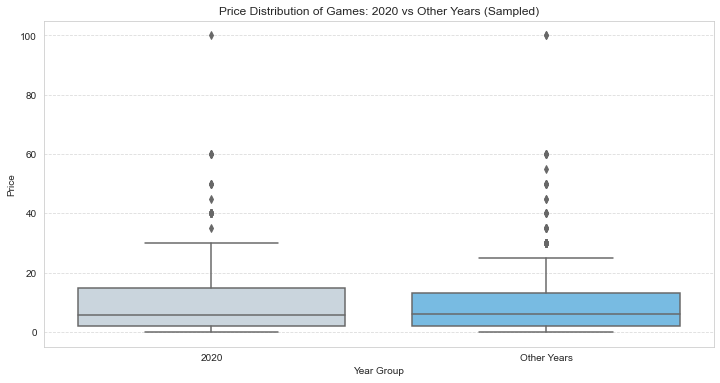

In [222]:
# Add a column for price group
sample_2020['price_group'] = '2020'
sample_non_2020['price_group'] = 'Other Years'

# Combine samples into a single DataFrame
combined_sample = pd.concat([sample_2020, sample_non_2020])

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='price_group', y='price_final', data=combined_sample, palette=custom_palette)

plt.title('Price Distribution of Games: 2020 vs Other Years (Sampled)')
plt.ylabel('Price')
plt.xlabel('Year Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<span style='color:#c7d5e0'>

<h3> Which year had the most expensive game releases overall? </h3>

<p> H0: Game prices have not significantly changed over the years </p>
<p> HA: Games prices have increased over the years </p>
<p> A significance level of 90% </p>

</span>

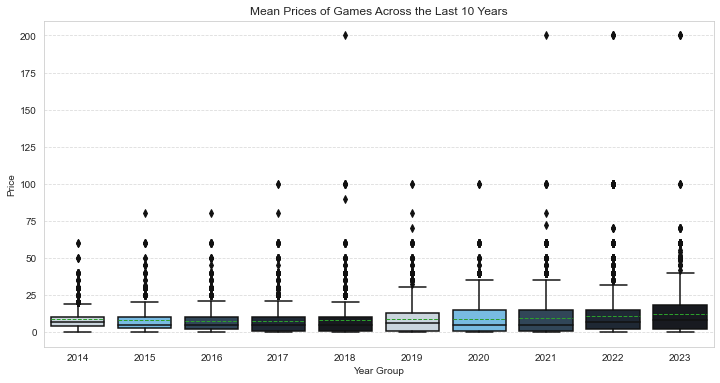

In [223]:
last_ten_years = filtered_df[~filtered_df['year'].between(1997, 2013)][['year','price_final']]

means_per_year = last_ten_years.groupby('year')['price_final'].mean()

sns.set_style(style="whitegrid")

plt.figure(figsize=(12, 6))

# Create the boxplot
sns.boxplot(x='year', y='price_final', data=last_ten_years, showmeans=True, meanline=True, palette=custom_palette)


plt.title('Mean Prices of Games Across the Last 10 Years')
plt.ylabel('Price')
plt.xlabel('Year Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [224]:
last_ten_years.groupby('year').describe()

price_final                                                      
           count       mean        std  min   25%   50%    75%     max
year                                                                  
2014      1338.0   8.874918   7.758010  0.0  3.99  6.99   9.99   59.99
2015      1994.0   7.859534   7.676566  0.0  2.99  4.99   9.99   79.99
2016      2942.0   7.428426   7.880083  0.0  1.99  4.99   9.99   79.99
2017      3473.0   7.657178   9.089136  0.0  0.99  4.99   9.99   99.99
2018      3694.0   8.038771  10.384270  0.0  0.99  4.99   9.99  199.99
2019      3193.0   9.044883  10.225926  0.0  0.99  5.99  12.99   99.99
2020      3902.0   8.985577  10.163902  0.0  0.99  4.99  14.99   99.99
2021      4471.0   9.181619  11.282049  0.0  0.99  4.99  14.99  199.99
2022      4769.0  10.754647  14.366454  0.0  1.99  6.99  14.99  199.99
2023      2300.0  12.218648  15.601864  0.0  1.99  8.09  17.99  199.99

It does seem as those prices are getting more expensive each year with the 2023 having the large mean of prices

In [225]:
observed_variance = last_ten_years.groupby('year').mean().var()[0]
print('Observed means:', last_ten_years.groupby('year').mean().values.ravel())
print('Variance:',observed_variance)

def perm_test(df):
    df = df.copy()
    df['price_final'] = np.random.permutation(df['price_final'].values)
    return df.groupby('year').mean().var()[0]

perm_variance = [perm_test(last_ten_years) for _ in range(3000)]
p_val = np.mean([var > observed_variance for var in perm_variance])
print('Pr(Prob)', p_val)

# Determine the alpha for significance level of 90%
alpha = 1 - 0.90

# Compare the p-value to the significance level
if p_val < alpha:
    print('Reject the null hypothesis (H0): Games prices have increased over the years.')
else:
    print('Fail to reject the null hypothesis (H0): Game prices have not significantly changed over the years.')

Observed means: [ 8.87491779  7.8595336   7.42842624  7.65717823  8.03877098  9.04488256
  8.98557663  9.18161932 10.75464668 12.21864783]
Variance: 2.2207529177049437
Pr(Prob) 0.0
Reject the null hypothesis (H0): Games prices have increased over the years.


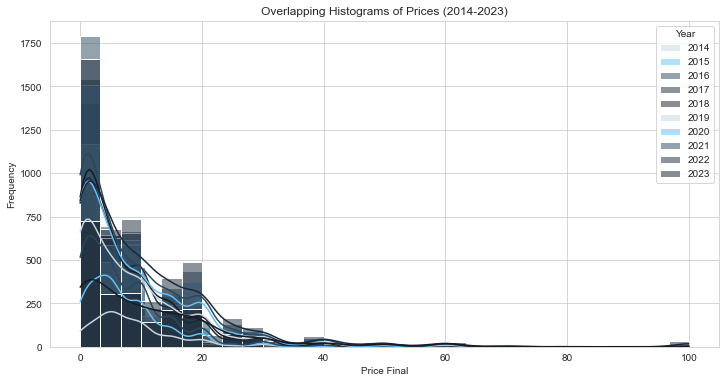

In [226]:
filtered_prices = last_ten_years[last_ten_years['price_final'] < 100.00]

sns.set_style(style="whitegrid")

plt.figure(figsize=(12, 6))

palette = custom_palette

# Loop through each year and plot a histogram for each
for i, year in enumerate(range(2014, 2024)):
    sns.histplot(data=filtered_prices[filtered_prices['year'] == year], 
                 x='price_final', 
                 color=palette[i],
                 kde=True,
                 bins=30, 
                 label=str(year), 
                 alpha=0.5)

# Customize the plot
plt.title('Overlapping Histograms of Prices (2014-2023)')
plt.xlabel('Price Final')
plt.ylabel('Frequency')
plt.legend(title='Year')

plt.show()

lineplot for above

<Figure size 1440x720 with 0 Axes>

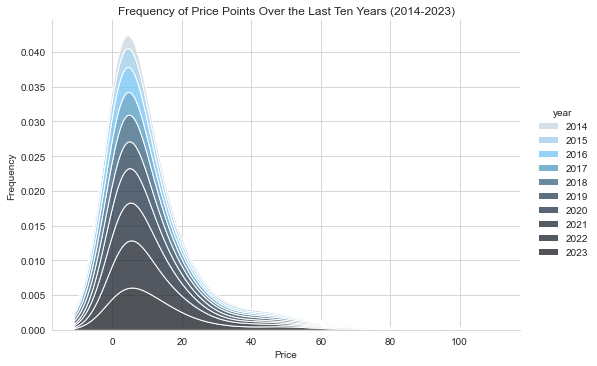

In [227]:
grouped_df = filtered_prices.groupby(['year', 'price_final']).size().reset_index(name='frequency')

plt.figure(figsize=(20, 10))

# sns.lineplot(data=grouped_df, x='price_final', y='frequency', hue='year', marker='o')
g = sns.displot(data=grouped_df, x='price_final', hue='year', kind='kde', multiple='stack', aspect=1.5, palette=custom_palette_gradient)

# Customize the plot
plt.title('Frequency of Price Points Over the Last Ten Years (2014-2023)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

____

<span style='color:#c7d5e0'>
<h2> Final Analysis </h2>

<p><b>CLEANING this data was pretty straightforward</b>. The first table was very clean and I only needed some of the rows for this analysis. The second table that was merged wasn't as clean, but I really only needed the app.id and genre. I changed the date_release column to datetime type. It helped with mapping the new columns for year and month later on. As for the second table, I separated the genre column into a separate dictionary that I used later on to understand how often those tags were represented. </p>
<p>I wanted to make sure that I was focused on particular elements of the total data so I did make a lot of smaller dataframes with only necessary columns.</p>
<p><b>DESCRIPTIVE ANALYSIS was focused with intention</b>. After seeing this data, I knew that I wanted to explore the impacts of the COVID lockdown on steam sales. I started with a broad look at the games and slowly worked towarded a more narrowed view of the 2020 games in this dataset. As a gamer I was aware that Windows would be the king in terms of operating systems. This data doesn't looking why that is the reason, but outside research reveals that developers call the process expensive, when trying to make games for MacOS. It was interesting to note that the average cost of games fell below $9. I think this is in part to the excessive amount of 'free to play' games as well as indie developers that publish and market on Steam. </p>
<p>When it came time to look deeper in to 2020, it was interesting to see that 'Indie' games and 'Action' games were the big release genres for 2020. This would make sense, especially since indie teams are generally smaller, and during a lockdown it's probably easier to develop these types of games from home. Lastly, I noted that games received approximately 75% of positive or better ratings on Steam. It seems like games did pretty well in 2020</p>
<p><b>INFERENTIAL ANALYSIS allowed me to step back from 2020 </b> and use that information to test how different games were during that time period and the rest of the past decade. There was a significant enough difference in the reviews provided for games outside of 2020. This might be in part to look at the rest of the decade, compared to 2020. I wondered if prices would significantly change outside of 2020, and there was an increase in that value. The numbers were definitely more varied between 2020 and 2023, but if you look at the yearly difference, it seems to follow closely to a normal inflation. I think a deeper look into these on a year vs. year basis might show more, but that is work to be done in the future.</p>
</span>

____

<span style='color:#c7d5e0'>
<h2> Recommendations </h2>
<p>Keep on track with your pricing model. There was an uptick in the mean price of games, but the increase looks steady enough and not dramatic.</p>
<p>Indie developers did work through 2020, and given their positive ratings, it would make sense to provide more support for more indie companies to get their foot into the game dev business.</p>
<p>Provide more stats to gamers beyond the end of year review. Gamers love stats</p>
</span>